In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Table of Contents

- [Challenge](#Challenge)
- [Analysis Plan](#Analysis-Plan)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Understanding the variables](#Understanding-the-variables)
    - [Handling missing data and datatypes](#Handling-missing-data-and-atatypes)
    - [Exploring the variables](#Exploring-the-variables)
        - [AÑO MES DIA DIANOM](#AÑO-MES-DIA-DIANOM)
        - [VLO ORI DES EMP TIPOVUELO](#VLO-ORI-DES-EMP-TIPOVUELO)
        - [FECHA-I FECHA-O](#FECHA-I-FECHA-O)
    - [Generate additional columns](#Generate-additional-columns)
        - [Delay Rate Behavior](#Delay-Rate-Behavior)
            - [Delay Rate Across Airlines](#Delay-Rate-Across-Airlines)
            - [Delay Rate Across Destination](#Delay-Rate-Across-Destination)
            - [Delay Rate Across Month of the Year](#Delay-Rate-Across-Month-of-the-Year)
            - [Delay Rate Across Season](#Delay-Rate-Across-Season)
            - [Delay Rate Across Flight Type](#Delay-Rate-Across-Flight-Type)
            - [Delay Rate Across Day of the week](#Delay-Rate-Across-Day-of-the-week)
            - [Relationship Between Delay Rate and Built Features](#Relationship-Between-Delay-Rate-and-Built-Features)
        - [What variables would you expect to have the most influence in predicting delays?](#[#What-variables-would-you-expect-to-have-the-most-influence-in-predicting-delays?])
- [Model Training](#Model-Training)
    - [Selecting and preparing the features](#Selecting-and-preparing-the-features)
    - [Define a Baseline model](#Define-a-Baseline-model)
    - [Training and Evaluation](#Training-and-Evaluation)
        - [Random Forest Classifier](#Random-Forest-Classifier)
        - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
        - [XGB Classifier](#XGB-Classifier)
        - [Consideration of the Ensamble Methods results](#Consideration-of-the-Ensamble-Methods-results)
    - [Hyper-parameter tuning of XGBoost](#Hyper-parameter-tuning-of-XGBoost)
    - [XGB Feature Importances](#XGB-Feature-Importances)
    - [OverSampling](#OverSampling)
    - [Feature Engineering](#Feature-Engineering)
    




# Challenge 

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017.

# Analysis Plan

- Check the dimensions of the dataset
- Check for missing values
- Explore the variables: Look at the variables in the dataset to understand what information is included.
- Check for outliers: Use summary statistics such as mean, median, and standard deviation to identify any extreme values that may be considered outliers.
- Visualize the data: Create visualizations such as histograms, scatter plots, or box plots to explore the data distribution and identify any patterns or trends.
- Calculate summary statistics: Calculate summary statistics such as mean, median, standard deviation, or percentiles to further explore the data.
- Explore relationships between variables: Use correlation analysis or other statistical techniques to explore the relationships between variables and identify any potential predictors of flight delays.
- Train and evaluate machine learning models


In [3]:
df = pd.read_csv("dataset_SCL.csv")

/var/folders/rd/m9yc5w7d1573qy221g2pwxrh0000gp/T/ipykernel_2671/1100006479.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_SCL.csv")


In [4]:
df.shape

(68206, 18)

# Exploratory Data Analysis

### Understanding the variables

1. Fecha-I: Scheduled date and time of the flight.
2. Vlo-I : Scheduled flight number.
3. Ori-I : Programmed origin city code.
4. Des-I : Programmed destination city code.
5. Emp-I : Scheduled flight airline code.
6. Fecha-O : Date and time of flight operation.
7. Vlo-O : Flight operation number of the flight.
8. Ori-O : Operation origin city code
9. Des-O : Operation destination city code.
10. Emp-O : Airline code of the operated flight.
11. DIA: Day of the month of flight operation.
12. MES : Number of the month of operation of the flight.
13. AÑO : Year of flight operation.
14. DIANOM : Day of the week of flight operation.
15. TIPOVUELO : Type of flight, I =International, N =National.
16. OPERA : Name of the airline that operates.
17. SIGLAORI: Name city of origin.
18. SIGLADES: Destination city name.

In [5]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## Handling missing data and datatypes

In [6]:
# While reading the dataframe, python accused some columns have mixes types. Let's check which columns are this 
df.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [7]:
df.isna().any()

Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

In [8]:
for col in df.columns:
    print(f"{col} -> {pd.api.types.infer_dtype(df[col])}")

Fecha-I -> string
Vlo-I -> mixed-integer
Ori-I -> string
Des-I -> string
Emp-I -> string
Fecha-O -> string
Vlo-O -> mixed
Ori-O -> string
Des-O -> string
Emp-O -> string
DIA -> integer
MES -> integer
AÑO -> integer
DIANOM -> string
TIPOVUELO -> string
OPERA -> string
SIGLAORI -> string
SIGLADES -> string


The columns "Vlo-I" and "Vlo-O" have been detected as mixed-integer, which means they contain both numeric and non-numeric values. Other columns, such as "Fecha-I" and "Fecha-O" are mapped to string values but it should be datetime. Some values in "Fecha-O" are null which requires further analysis. 
 
Overall, the results suggest that the dataframe may require some data cleaning and type conversion to ensure the accuracy and consistency of the data for further analysis.

In [9]:
# convert columns to datetime
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df[["Fecha-I", "Fecha-O"]].dtypes

Fecha-I    datetime64[ns]
Fecha-O    datetime64[ns]
dtype: object

In [10]:
# most values of Vlo-I are numerics.
df["Vlo-I"].sample(10)

737      7663
2267      501
60676     576
7199        1
15638     344
3227      176
37176     461
64772     138
14949     259
28224    8021
Name: Vlo-I, dtype: object

In [11]:
# List the values that are not numeric 
df.loc[~df["Vlo-I"].apply(lambda x: str(x).isdigit()), :]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


A flight number is a unique identifier assigned to a specific flight by an airline. It typically consists of a two-letter airline code, followed by a three or four-digit number that identifies the specific flight. The flight number is used to track the flight's status, schedule, and other information related to the flight.

Since the flight number is not a numeric quantity that can be subjected to mathematical operations, it can be considered a categorical variable. Therefore, it makes sense to map the "Vlo-I" column to the string data type to represent the flight number as a categorical variable. By doing this, the data will be more accurately represented and can be properly analyzed using methods appropriate for categorical data.

In [12]:
df["Vlo-I"] = df["Vlo-I"].astype(str)


--

Let's check what are the missing values on Vl0-I

In [13]:
df[df["Vlo-O"].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [14]:
# The data indicated that Scheduled flight number Vlo-I should be the same as for Vlo-O for most of the cases. 
df.loc[df["Vlo-I"] == "200",].head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6058,2017-01-01 11:00:00,200,SCEL,SPJC,LAW,2017-01-01 11:07:00,200,SCEL,SPJC,48O,1,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6059,2017-01-03 11:00:00,200,SCEL,SPJC,LAW,2017-01-03 11:23:00,200,SCEL,SPJC,48O,3,1,2017,Martes,I,Latin American Wings,Santiago,Lima
6060,2017-01-08 11:00:00,200,SCEL,SPJC,LAW,2017-01-08 11:46:00,200,SCEL,SPJC,48O,8,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6061,2017-01-09 11:00:00,200,SCEL,SPJC,LAW,2017-01-09 11:08:00,200,SCEL,SPJC,48O,9,1,2017,Lunes,I,Latin American Wings,Santiago,Lima
6062,2017-01-11 11:00:00,200,SCEL,SPJC,LAW,2017-01-11 11:10:00,200,SCEL,SPJC,48O,11,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima


In [15]:
# Let's calculate the percentage of flights where the flight number in the "Vlo-I"
# column matches the flight number in the "Vlo-O" column


(df["Vlo-I"] == df["Vlo-O"]).sum() / df.shape[0]

0.9337448318329765

In [16]:
# We observerd the presence of decimal values in the "Vlo-O" column. 
# To ensure accurate comparison with the "Vlo-I" column, we'll remove the decimal values and 
# re-calculate the rate of flights where the "Vlo-O" value matches the "Vlo-I" value.


(df["Vlo-O"].apply(lambda x: str(x).split(".")[0]) == df["Vlo-I"]).sum() / df.shape[0]

0.9982406239920242

In [17]:
df["Vlo-O"] = df["Vlo-O"].apply(lambda x: str(x).split(".")[0])

In [18]:
# Since 99% of "Vlo-O" values matches the "Vlo-I" values we can safely input the missing data with 
# the value present in "Vlo-I"

df.loc[df["Vlo-O"].isna(), "Vlo-O"] = df.loc[df["Vlo-O"].isna(), "Vlo-I"]

In [19]:
df["Vlo-O"].isna().any()

False

## Exploring the variables

### AÑO MES DIA DIANOM

In [20]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [21]:
df["AÑO"].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

<AxesSubplot: >

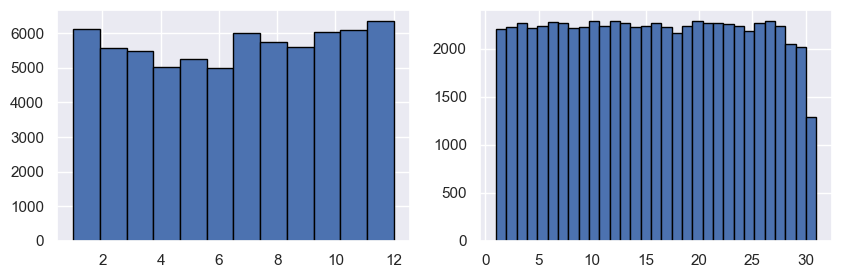

In [22]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(10,3))

df["MES"].hist(ax=axs[0], bins=12, edgecolor='black')
df["DIA"].hist(ax=axs[1], bins=31, edgecolor='black')

The distribution of the "MES" variable appears to be relatively uniform, with the number of flights occurring in each month varying by only a few hundred flights. The highest number of flights occurred in December (6356 flights), followed closely by January (6108 flights) and November (6080 flights), while the lowest number of flights occurred in June (4981 flights).

The distribution of the variable shows that there are more flights departing from Santiago, Chile in December, January, and February (months 12, 1, and 2 respectively), which corresponds to the summer vacation period in the Southern Hemisphere. On the other hand, there are fewer flights in the months of May, June, and July (months 5, 6, and 7), which correspond to the winter season in the Southern Hemisphere. This pattern suggests a seasonal variation in the demand for flights departing from Santiago, Chile, with higher demand during the summer months and lower demand during the winter months.


In [23]:
df.groupby(["AÑO",  "DIA"])["DIA"].count()

AÑO   DIA
2017  1      2206
      2      2223
      3      2271
      4      2215
      5      2241
      6      2275
      7      2264
      8      2213
      9      2227
      10     2283
      11     2237
      12     2284
      13     2272
      14     2221
      15     2239
      16     2268
      17     2228
      18     2160
      19     2238
      20     2290
      21     2267
      22     2272
      23     2260
      24     2232
      25     2179
      26     2267
      27     2286
      28     2232
      29     2044
      30     2020
      31     1290
2018  1         2
Name: DIA, dtype: int64

Days 20, 27, and 12 had the highest number of flights, while days 18, 25, and 29 had the lowest number of flights. There are also fewer flights in the latter part of the month, with days 30 and 31 having the fewest flights.

Since the day 31 only occurs in seven months of the year, while the other days occur in all twelve months, it's likely that there are fewer flights on the 31st due to the fact that it's only applicable to a smaller subset of the year.

Text(0.5, 1.0, 'Distribution of flights by day of the week')

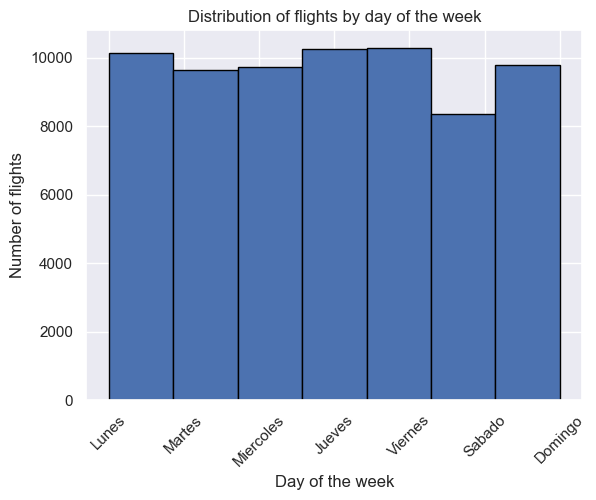

In [24]:
day_map = {'Lunes': 1, 'Martes': 2, 'Miercoles': 3, 'Jueves': 4, 'Viernes': 5, 'Sabado': 6, 'Domingo': 7}

# add a new column with the day numbers
df['day_num'] = df['DIANOM'].map(day_map)

# sort the dataframe by day_num
df = df.sort_values(by='day_num')

# create the histogram
df['DIANOM'].hist(bins=7, edgecolor='black')
plt.xticks(rotation=45)

# set the axis labels and title
plt.xlabel('Day of the week')
plt.ylabel('Number of flights')
plt.title('Distribution of flights by day of the week')



The data shows that the number of flights per day varies throughout the year, with higher numbers in the summer and lower numbers in the winter. The 30th and 31st of each month have lower numbers of flights than other days, likely due to the fact that fewer months have 31 days.

The day of the week with the highest number of flights is Friday, followed closely by Thursday and Monday. The lowest number of flights occur on Saturdays.

In [25]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num
34102,2017-07-03 18:00:00,108,SCEL,SCSE,SKU,2017-07-03 18:05:00,108,SCEL,SCSE,SKU,3,7,2017,Lunes,N,Sky Airline,Santiago,La Serena,1
42263,2017-08-14 18:00:00,318,SCEL,SCAT,LAN,2017-08-14 18:04:00,318,SCEL,SCAT,LXP,14,8,2017,Lunes,N,Grupo LATAM,Santiago,Copiapo,1
23072,2017-05-01 19:30:00,8069,SCEL,SBGR,TAM,2017-05-01 20:28:00,8069,SCEL,SBGR,TAM,1,5,2017,Lunes,I,Grupo LATAM,Santiago,Sao Paulo,1
60587,2017-11-27 20:20:00,530,SCEL,SPJC,LAN,2017-11-27 20:22:00,530,SCEL,SPJC,LAN,27,11,2017,Lunes,I,Grupo LATAM,Santiago,Lima,1
23069,2017-05-29 04:15:00,8029,SCEL,SBGR,TAM,2017-05-29 04:25:00,8029,SCEL,SBGR,TAM,29,5,2017,Lunes,I,Grupo LATAM,Santiago,Sao Paulo,1


### VLO ORI DES EMP TIPOVUELO

In [26]:
df["Ori-I"].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-I, dtype: object

In [27]:
df["Ori-O"].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-O, dtype: object

All the scheduled flights have Santiago, Chile as their origin city and the operated flights also have Santiago as either their origin or destination city.

---

In [28]:
# in 99% of the cases, the scheduled destination of a flight matches the actual operated destination.
(df["Des-I"] == df["Des-O"]).sum() / df.shape[0]

0.9995894789314723

In [29]:
df["ChangedDestionationAirport"] = (df["Des-I"] != df["Des-O"])

In [30]:
df.loc[df["ChangedDestionationAirport"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,ChangedDestionationAirport
24569,2017-05-13 18:25:00,136,SCEL,SCFA,LAN,2017-05-13 18:24:00,136,SCEL,SCCF,LAN,13,5,2017,Sabado,N,Grupo LATAM,Santiago,Calama,6,True
16937,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,22,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,3,True
67599,2017-12-01 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-01 11:22:00,7811,SCEL,SABE,DSM,1,12,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires,5,True
67697,2017-12-16 02:45:00,1261,SCEL,SARI,LAN,2017-12-16 02:43:00,1261,SCEL,SBFI,LAN,16,12,2017,Sabado,I,Grupo LATAM,Santiago,Cataratas Iguacu,6,True
18293,2017-04-14 18:40:00,25,SCEL,SCTE,SKU,2017-04-14 18:48:00,25,SCEL,SCQP,SKU,14,4,2017,Viernes,N,Sky Airline,Santiago,Temuco,5,True
20444,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,14,4,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas,5,True
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco,2,True
67601,2017-12-03 11:20:00,7811,SCEL,SAEZ,LAN,2017-12-03 11:30:00,7811,SCEL,SABE,DSM,3,12,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires,7,True
38135,2017-07-17 16:00:00,7813,SCEL,SABE,LAN,2017-07-17 16:41:00,1113,SCEL,SAEZ,LAN,17,7,2017,Lunes,I,Grupo LATAM,Santiago,Buenos Aires,1,True
61463,2017-11-06 06:00:00,1031,SCEL,SCIE,LAW,2017-11-06 08:01:00,1031,SCEL,SCTE,JMR,6,11,2017,Lunes,N,Latin American Wings,Santiago,Puerto Montt,1,True


In [31]:
df.loc[df["ChangedDestionationAirport"] == True].groupby(["Des-I","Des-O"])["Des-O"].count()

Des-I  Des-O
KIAH   KIAD     1
KJFK   KMIA     1
SABE   SAEZ     4
SAEZ   SABE     3
SARI   SBFI     1
SBGR   SBGL     1
SCBA   SCTE     4
SCCI   SCTE     1
SCFA   SCCF     1
SCIE   SCQP     1
       SCTE     1
SCTE   SCCI     1
       SCQP     5
SEGU   SABE     1
SEQU   SEQM     1
YSSY   YMML     1
Name: Des-O, dtype: int64

The most common changes involve airports in Buenos Aires, with SABE and SAEZ airports exchanging flights, and Santiago, with SCTE airport being a common replacement for flights originally scheduled to land at SCQP.



In [32]:
df.shape

(68206, 20)

In [33]:
tmp = df.groupby(["SIGLADES"]).size().sort_values(ascending=False).reset_index(name='Count')
tmp["Percentage"] = tmp["Count"] / tmp["Count"].sum()

In [34]:
tmp.head(10)

,SIGLADES,Count,Percentage
0,Buenos Aires,6335,0.092880
1,Antofagasta,5786,0.084831
2,Lima,5270,0.077266
3,Calama,5146,0.075448
4,Puerto Montt,4357,0.063880
5,Concepcion,3993,0.058543
6,Iquique,3747,0.054937
7,Sao Paulo,3569,0.052327
8,Temuco,2589,0.037959
9,Arica,2436,0.035715


We can see that the top 10 destinations of the flights in this dataset are mainly located in Argentina, Chile, Peru, and Brazil. Buenos Aires, Antofagasta, and Lima are the top three destinations with the highest number of flights. Additionally, we can see that these top 10 destinations account for a significant proportion of the total flights, which indicates their importance as travel hubs in this region.

---

In [35]:
(df["Emp-I"] == df["Emp-O"]).sum() / df.shape[0]

0.726285077559159

For about 73% of the scheduled flights, the airline remains the same for the operation, meaning that in 27% of cases there is a change of airline from the scheduled flight to the operated flight.

In [36]:
df["ChangedAirline"] = (df["Emp-I"] != df["Emp-O"])

In [37]:
df.loc[df["ChangedAirline"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,ChangedDestionationAirport,ChangedAirline
41897,2017-08-24 19:01:00,265,SCEL,SCTE,LAN,2017-08-24 19:07:00,265,SCEL,SCTE,LXP,24,8,2017,Jueves,N,Grupo LATAM,Santiago,Puerto Montt,4,False,True
42272,2017-08-24 17:48:00,318,SCEL,SCAT,LAN,2017-08-24 17:50:00,318,SCEL,SCAT,LXP,24,8,2017,Jueves,N,Grupo LATAM,Santiago,Copiapo,4,False,True
25398,2017-05-23 19:00:00,267,SCEL,SCTE,LAN,2017-05-23 19:16:00,267,SCEL,SCTE,LXP,23,5,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt,2,False,True
3361,2017-01-07 08:50:00,203,SCEL,SCIE,LAN,2017-01-07 08:45:00,203,SCEL,SCIE,LXP,7,1,2017,Sabado,N,Grupo LATAM,Santiago,Concepcion,6,False,True
16996,2017-03-02 04:55:00,2702,SCEL,SPJC,LAN,2017-03-02 05:02:00,2702,SCEL,SPJC,LPE,2,3,2017,Jueves,I,Grupo LATAM,Santiago,Lima,4,False,True
3566,2017-01-30 13:55:00,233,SCEL,SCQP,LAN,2017-01-30 14:38:00,233,SCEL,SCQP,LXP,30,1,2017,Lunes,N,Grupo LATAM,Santiago,Temuco,1,False,True
56540,2017-11-28 13:35:00,28,SCEL,YSSY,QFU,2017-11-28 13:53:00,28,SCEL,YSSY,QFA,28,11,2017,Martes,I,Qantas Airways,Santiago,Sydney,2,False,True
42450,2017-08-26 12:03:00,340,SCEL,SCCF,LAN,2017-08-26 11:54:00,340,SCEL,SCCF,LXP,26,8,2017,Sabado,N,Grupo LATAM,Santiago,Calama,6,False,True
32065,2017-06-16 23:00:00,1446,SCEL,SEGU,LAN,2017-06-17 01:25:00,1446,SCEL,SEGU,LNE,17,6,2017,Sabado,I,Grupo LATAM,Santiago,Guayaquil,6,False,True
25608,2017-05-18 10:30:00,300,SCEL,SCSE,LAN,2017-05-18 10:31:00,300,SCEL,SCSE,LXP,18,5,2017,Jueves,N,Grupo LATAM,Santiago,La Serena,4,False,True


In [38]:
df.loc[df["ChangedAirline"] == True].groupby(["Emp-I","Emp-O"])["Emp-O"].count()

Emp-I  Emp-O
ARG    AUT          5
AUT    ARG          2
AVA    LRC        265
       TPU          2
LAN    DSM        491
       LNE        373
       LPE       1210
       LXP      14549
LAW    48O         10
       56R         17
       JMR       1547
QFU    QFA        195
TAM    LAP          3
Name: Emp-O, dtype: int64

Based on the information available on the [Wikipedia page](https://en.wikipedia.org/wiki/LATAM_Airlines_Group) for LATAM Airlines Group, this company contains many susidiaries. And it seems that a majority of airline changes occur within subsidiaries of the same parent airline. In the case of LATAM, most of the changes involve subsidiaries such as LAN, LXP, LPE, and LNE, which all belong to the same parent company. Similarly, for Avianca, most of the changes involve subsidiaries such as Avianca Ecuador and Avianca Costa Rica.

In [39]:
tmp = df.groupby(["OPERA"]).size().sort_values(ascending=False).reset_index(name='Count')
tmp["Percentage"] = tmp["Count"] / tmp["Count"].sum()
tmp.head(10)

,OPERA,Count,Percentage
0,Grupo LATAM,40892,0.599537
1,Sky Airline,14298,0.209630
2,Aerolineas Argentinas,1949,0.028575
3,Copa Air,1850,0.027124
4,Latin American Wings,1674,0.024543
5,Avianca,1152,0.016890
6,JetSmart SPA,1095,0.016054
7,Gol Trans,806,0.011817
8,American Airlines,757,0.011099
9,Air Canada,565,0.008284


the majority of flights are operated by the Grupo LATAM, which accounts for approximately 60% of all flights. Sky Airline is the second most popular airline, with around 21% of the flights. The other airlines on the list have a much smaller percentage of flights.

---

In [40]:
df["ChangedFlightNumber"] = (df["Vlo-I"] != df["Vlo-O"])

In [41]:
df.loc[df["ChangedFlightNumber"] == True].sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,day_num,ChangedDestionationAirport,ChangedAirline,ChangedFlightNumber
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena,7,False,False,True
11608,2017-02-23 21:40:00,4503,SCEL,SAEZ,LAN,2017-02-23 21:49:00,1003,SCEL,SAEZ,LAN,23,2,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,4,False,False,True
22301,2017-05-26 09:40:00,401,SCEL,LFPG,AFR,2017-05-26 10:03:00,401A,SCEL,LFPG,AFR,26,5,2017,Viernes,I,Air France,Santiago,Paris,5,False,False,True
17034,2017-03-15 15:10:00,4501,SCEL,SAEZ,LAN,2017-03-15 15:17:00,1001,SCEL,SAEZ,LAN,15,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires,3,False,False,True
37592,2017-07-04 18:10:00,636,SCEL,SPJC,LAN,2017-07-04 18:31:00,2486,SCEL,SPJC,LPE,4,7,2017,Martes,I,Grupo LATAM,Santiago,Lima,2,False,True,True
11612,2017-02-27 21:40:00,4503,SCEL,SAEZ,LAN,2017-02-27 21:41:00,1003,SCEL,SAEZ,LAN,27,2,2017,Lunes,I,Grupo LATAM,Santiago,Buenos Aires,1,False,False,True
27244,2017-05-30 07:55:00,7811,SCEL,SAEZ,LAN,2017-05-30 08:42:00,1101,SCEL,SAEZ,LAN,30,5,2017,Martes,I,Grupo LATAM,Santiago,Buenos Aires,2,False,False,True
11645,2017-02-17 01:15:00,702,SCEL,SPJC,LAW,2017-02-17 02:20:00,700,SCEL,SPJC,JMR,17,2,2017,Viernes,I,Latin American Wings,Santiago,Lima,5,False,True,True
11592,2017-02-06 21:50:00,4503,SCEL,SAEZ,LAN,2017-02-06 22:34:00,1303,SCEL,SAEZ,LAN,6,2,2017,Lunes,I,Grupo LATAM,Santiago,Buenos Aires,1,False,False,True
17092,2017-03-19 01:15:00,700,SCEL,SPJC,LAW,2017-03-19 01:21:00,704,SCEL,SPJC,JMR,19,3,2017,Domingo,I,Latin American Wings,Santiago,Lima,7,False,True,True


In [42]:
df.loc[df["ChangedFlightNumber"] == True].groupby(["Vlo-I", "Vlo-O"])["Vlo-O"].count().sort_values()

Vlo-I  Vlo-O
1011   11        1
4503   1004      1
940P   940       1
455    1155      1
492    492R      1
500    1340      1
502    502R      1
503    502       1
530    1102      1
       534       1
532    1346      1
600    1160      1
       1300      1
4503   1001      1
622    622R      1
636    2486      1
700    702       1
       704       1
704    708       1
7811   1061      1
       1111      1
7813   1071      1
802    802R      1
846    2726      1
       2763      1
       846A      1
846A   2804      1
624    5924      1
43     43R       1
989P   989       1
41     1041      1
146    9860      1
1446   1361      1
1302   2640      1
1498   1304      1
1704   1700      1
       704       1
200    nan       1
201    201R      1
204    202       1
207    207R      1
2287   1287      1
118    4118      1
2291   1291      1
2374   1102      1
114    114R      1
302    304       1
31     1031      1
338    338R      1
1104A  1104      1
400    1400      1
401    401A      1

Some flights have had multiple changes over time. For example, flight 71 had two changes and became flight 71R, while flight 702 changed twice, first to 704 and then back to 702. Additionally, some flights had variations in their operation numbers such as 401A and 401B.

---

In [43]:
df["TIPOVUELO"].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

The difference between the two types is not very significant, as there are around 5,000 more flights of type "N" than type "I"

Some conclusions 

- The data only contain flights originating from Santiago, Chile. 
- There are frequent changes in flights between Buenos Aires airports and Santiago, with SCTE airport being a common replacement for SCQP.
- Most of the airline changes occur within subsidiaries of the same parent airline, such as LAN, LXP, LPE, and LNE for LATAM Airlines Group, and Avianca Ecuador and Avianca Costa Rica for Avianca.
- Multiple changes in flight numbers are not uncommon, and some flights have variations in their operation numbers.

### FECHA-I FECHA-O

"Fecha-I" refers to the scheduled date and time of the flight, while "Fecha-O" refers to the actual date and time of the flight operation.

In [44]:
df["DepartureHour"] = df["Fecha-I"].dt.hour

Text(0.5, 1.0, 'Distribution of Flight Departure Times')

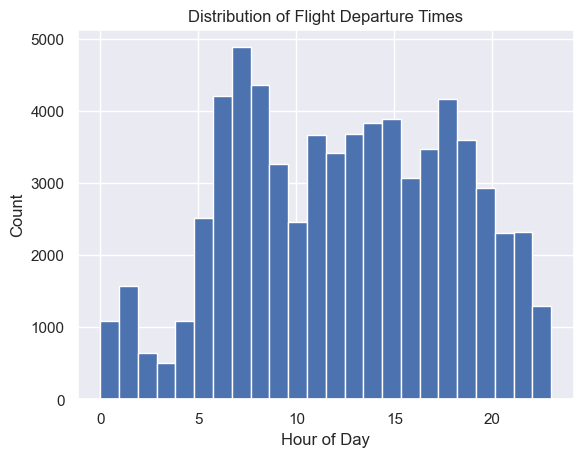

In [45]:
df["DepartureHour"] .hist(bins=24)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Distribution of Flight Departure Times")

The data indicates that the most common departure times are in the early morning (between 6am and 9am) and in the evening (between 6pm and 9pm). Specifically, 7am is the most common departure time with 4882 flights, followed closely by 8am with 4363 flights. The least common departure times are during the night, with only a few flights departing after 10pm and before 5am.

## Generate additional columns
*Please export them to a CSV file named synthetic_features.csv:* 

Generate the High Season feature and perform an analysis

- high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
- min_diff : difference in minutes between Date-O and Date-I .
- delay_15 : 1 if min_diff > 15, 0 if not.
- period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I.



In [46]:
condition1 = (df["Fecha-I"].dt.month == 12) & (df["Fecha-I"].dt.day >= 15)
condition2 = (df["Fecha-I"].dt.month == 1) | (df["Fecha-I"].dt.month == 2)
condition3 = (df["Fecha-I"].dt.month == 3) & (df["Fecha-I"].dt.day <= 3)
condition4 = (df["Fecha-I"].dt.month == 7) & (df["Fecha-I"].dt.day >= 15) & (df["Fecha-I"].dt.day <= 31)
condition5 = (df["Fecha-I"].dt.month == 9) & (df["Fecha-I"].dt.day >= 11) & (df["Fecha-I"].dt.day <= 30)

In [47]:
df["high_season"] = (condition1 | condition2 | condition3 | condition4 | condition5).astype(int)

In [48]:
df["high_season"].value_counts()

0    45444
1    22762
Name: high_season, dtype: int64

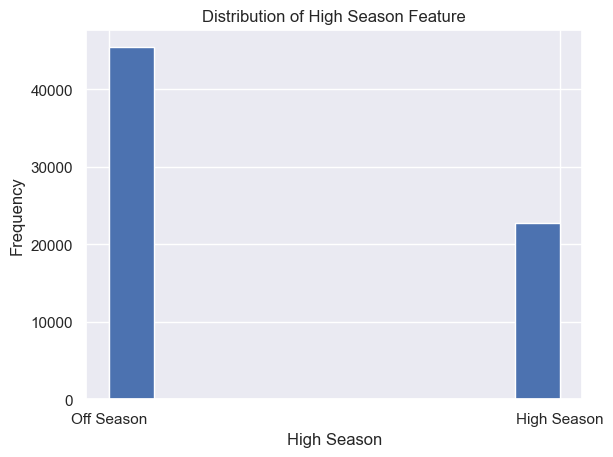

In [49]:
df["high_season"].hist()
plt.title("Distribution of High Season Feature")
plt.xlabel("High Season")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["Off Season", "High Season"]);

It seems that there are more non-high season flights than high season flights in the dataset, which is not surprising given that high season periods are typically shorter than low season periods. However, it would be interesting to examine the distribution of other variables in high season vs. low season flights to identify any notable differences or patterns.

In [50]:
df["high_season"].describe()

count    68206.000000
mean         0.333724
std          0.471546
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: high_season, dtype: float64

Since "high_season" is a binary variable, the mean of 0.33 suggests that approximately one-third of the records in the dataset have a value of 1 for "high_season".

In [51]:
opera_pivot = pd.pivot_table(df, values='high_season', index='OPERA', aggfunc='mean')
opera_pivot = opera_pivot.sort_values(by='high_season', ascending=False)

print(opera_pivot.head(10))

                          high_season
OPERA                                
Plus Ultra Lineas Aereas     0.408163
Lacsa                        0.391304
Gol Trans                    0.370968
Qantas Airways               0.353846
American Airlines            0.350066
Air Canada                   0.343363
United Airlines              0.340299
Copa Air                     0.338919
Sky Airline                  0.338789
Grupo LATAM                  0.337646


In [52]:
flight_type_pivot = pd.pivot_table(df, values='high_season', index='TIPOVUELO', aggfunc='mean')
flight_type_pivot = flight_type_pivot.sort_values(by='high_season', ascending=False)

print(flight_type_pivot)

           high_season
TIPOVUELO             
N             0.334172
I             0.333195


In [53]:
pivot = pd.pivot_table(df, values='high_season', index='SIGLADES', aggfunc='mean')
pivot = pivot.sort_values(by='high_season', ascending=False)

print(pivot.head(10))

                  high_season
SIGLADES                     
Cataratas Iguacu     1.000000
Punta del Este       0.833333
Puerto Natales       0.797468
Florianapolis        0.790123
Orlando              0.617647
Cancun               0.428571
Balmaceda            0.414779
Valdivia             0.379814
Rio de Janeiro       0.374216
Punta Arenas         0.372922


In [54]:
pivot = pd.pivot_table(df, values='high_season', index='DIANOM', aggfunc='mean')
pivot = pivot.sort_values(by='high_season', ascending=False)

print(pivot)

           high_season
DIANOM                
Sabado        0.359315
Viernes       0.344345
Lunes         0.337676
Domingo       0.332891
Miercoles     0.327299
Jueves        0.319188
Martes        0.318878


The high season flight analysis showed that most flights in the dataset occur during the non-high season periods. However, some destinations, airlines, and flight types have a higher proportion of high season flights. Beach destinations like Cataratas Iguacu, Punta del Este, and Cancun have more high season flights. Plus Ultra Lineas Aereas, Lacsa, Gol Trans, and Qantas Airways have a higher proportion of high season flights compared to other airlines. The day of the week did not show significant differences in the proportion of high season flights.

### Delay Feature
- The "min_diff" feature represents the difference in minutes between the scheduled arrival time (Fecha-O) and the scheduled departure time (Fecha-I)
- The "delay_15" is a binary indicator variable for whether a flight was delayed by more than 15 minutes or not. 
- The "period_day" variable is a categorical variable that categorizes the time of day when the flight occurred. 


In [55]:
df["min_diff"] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

df['delay_15'] = df['min_diff'].apply(lambda x: 1 if x > 15 else 0)

df['period_day'] = pd.cut(df['Fecha-I'].dt.hour, 
                            bins=[0, 5, 12, 19, 24], 
                            labels=['night', 'morning', 'afternoon', 'night'],  ordered=False)

--- 
Saving the synthetic features 

In [56]:
df[["high_season", "min_diff", "delay_15", "period_day"]].to_csv("synthetic_features.csv", index=None)


### Delay Rate Behavior

**3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?**


Text(0, 0.5, 'Frequency')

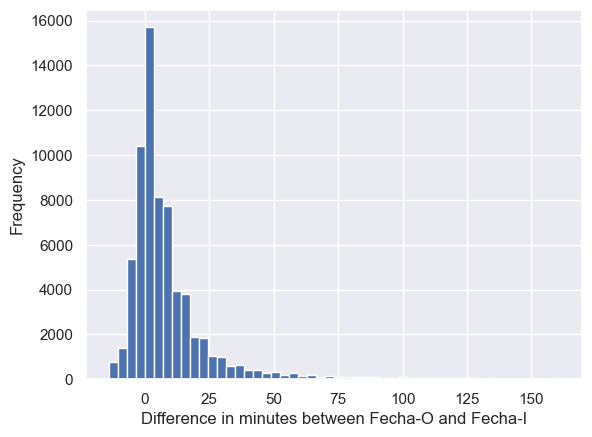

In [57]:
df["min_diff"].hist(bins=50)
plt.xlabel('Difference in minutes between Fecha-O and Fecha-I')
plt.ylabel('Frequency')

In [58]:
df["min_diff"].describe()

count    68206.000000
mean         9.110855
std         19.313387
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: min_diff, dtype: float64

The minimum time difference between the scheduled and actual flight times (min_diff) is -14 minutes, indicating that some flights departed earlier than their scheduled time.The maximum difference is 161 minutes, indicating that some flights departed significantly later than their scheduled time. The mean time difference is 9.1 minutes, which suggests that, on average, flights departed slightly later than their scheduled time.



In [59]:
df["delay_15"].value_counts() / df["delay_15"].size

0    0.81506
1    0.18494
Name: delay_15, dtype: float64

We can observe that the delay_15, which will be our target variable, is unbalanced as the percentage of flights that were not delayed for more than 15 minutes (0) is significantly higher than the percentage of delayed flights (1). This class imbalance can negatively affect the performance of our machine learning model as it may learn to prioritize the majority class and ignore the minority class.


When starting the model assesment we'll revisit this proble to handle this class imbalance and improve the model's ability to predict delayed flights

#### Delay Rate Across Airlines

In [60]:
def get_delay_rates(variable):
    df_by_var = df.groupby(variable)
    total_flights = df_by_var.size()
    
    delayed_flights = df_by_var["delay_15"].sum()
    delay_rate = delayed_flights / total_flights
    delay_rate = delay_rate.sort_values(ascending=False)
    
    return delayed_flights, total_flights, delay_rate

def barplot_delay_rate(delay_rate, title, x_label, y_label):
    
    plt.barh(y=delay_rate.index, width=delay_rate.values, )

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yticks(size=8);
    
def scatter_total_flights_delay_rate(total_flights, delay_rate):
    plt.scatter(total_flights, delay_rate)

    # set labels and title
    plt.xlabel('Total Flights')
    plt.ylabel('Delay Rate')
    plt.title('Relationship between Total Flights and Delay Rate')


In [61]:
delayed_flights, total_flights, delay_rate = get_delay_rates("Emp-I")

In [62]:
delay_rate

Emp-I
LNE    1.000000
DSM    1.000000
LXP    0.777778
PUE    0.612245
QFU    0.579487
LPE    0.500000
ACA    0.456637
LAW    0.407878
JMR    0.390000
GLO    0.356079
LAP    0.282407
AVA    0.265625
TAM    0.255822
ARG    0.240123
AUT    0.202703
JAT    0.178995
SKU    0.177647
LAN    0.171572
ONE    0.154122
BAW    0.141463
LRC    0.119565
AZA    0.111969
IBE    0.099448
AFR    0.083799
KLM    0.083665
AAL    0.067371
CMP    0.062703
DAL    0.058659
UAL    0.050746
AMX    0.028490
dtype: float64

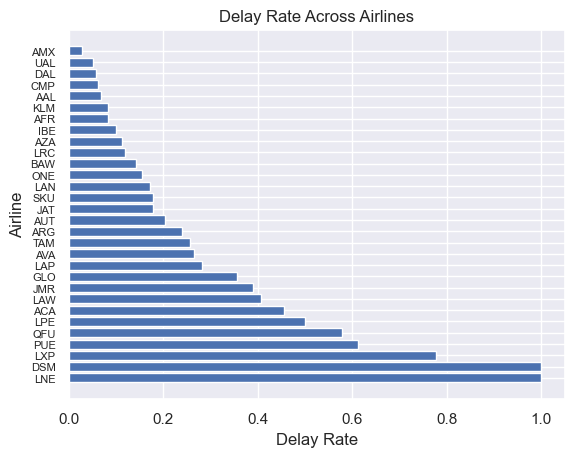

In [63]:
barplot_delay_rate(delay_rate, "Delay Rate Across Airlines", "Delay Rate", "Airline")

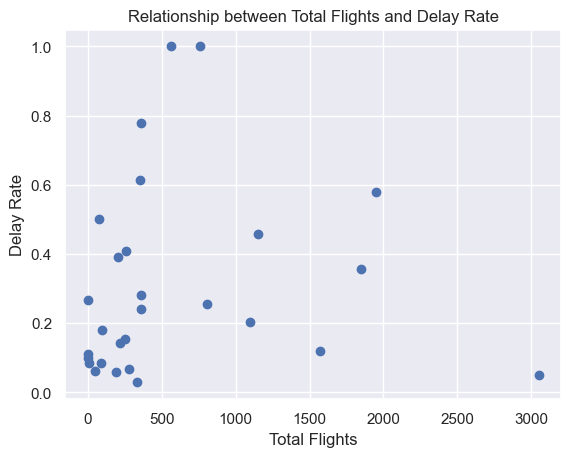

In [64]:
scatter_total_flights_delay_rate(total_flights[total_flights <14000], delay_rate[total_flights <14000])

In [65]:
delayed_flights.reset_index().merge(total_flights.reset_index(name="TotalFlights"), on="Emp-I", how="left").sort_values(by="TotalFlights")

,Emp-I,delay_15,TotalFlights
20,LNE,1,1
11,DSM,2,2
21,LPE,2,4
23,LXP,7,9
25,PUE,30,49
5,AUT,15,74
22,LRC,11,92
15,JMR,39,100
26,QFU,113,195
8,BAW,29,205


From the delay rate data, we can see that some airlines have a very high delay rate, while others have a very low delay rate. For example, airlines like LNE, DSM, and LXP have a 100% delay rate, while airlines like AMX, UAL, and DAL have a delay rate below 10%. However, some of these airlines have very few flights, which can make their delay rate less meaningful.

We can have a look at the distribution of min_diff of the airlines to understand the airlines dalay rate. 

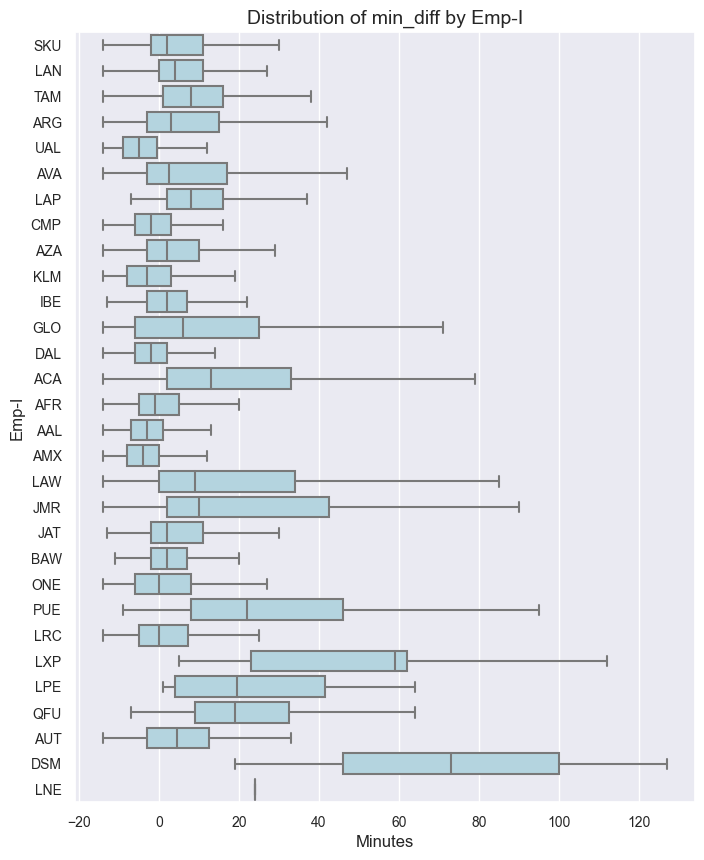

In [66]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.set_style('whitegrid')
sns.boxplot(x='min_diff', y='Emp-I', data=df, orient='h', ax=ax, color='lightblue', showfliers=False)

ax.set_title('Distribution of min_diff by Emp-I', fontsize=14)
ax.set_xlabel('Minutes', fontsize=12)
ax.set_ylabel('Emp-I', fontsize=12)

ax.tick_params(axis='both', labelsize=10)

The boxplot showed that the delay varies significantly across airlines, with some airlines having consistently high delays (such as PUE and LXP) and others having consistently low delays (such as UAL). The analysis also revealed that some airlines had a very small sample size, indicating that not enough data is available to make conclusions about their delay rates.

#### Delay Rate Across Destination

In [67]:
delayed_flights, total_flights, delay_rate = get_delay_rates("Des-I")

In [68]:
delay_rate.head(10)

Des-I
EGYP    1.000000
SLCB    1.000000
SEQU    1.000000
SEQM    1.000000
SAWH    0.666667
YSSY    0.579487
YMML    0.552632
SAZS    0.500000
SAAR    0.397059
NZAA    0.373961
dtype: float64

Let's examine the delay rate for destinations with over 10 flights.

Examining the delay rate for destinations with over 10 flights can provide a more accurate representation of the overall performance of the airline when flying to certain destinations. By analyzing a larger sample size of flights to a particular destination, it is possible to identify potential patterns or issues that could be impacting the airline's on-time performance

In [69]:
delay_rate_gt_10 = delay_rate[delayed_flights > 10]

In [70]:
delay_rate_gt_10.head(10)

Des-I
YSSY    0.579487
YMML    0.552632
SAAR    0.397059
NZAA    0.373961
MDPC    0.333333
CYYZ    0.314488
SACO    0.301075
SGAS    0.284483
SBGL    0.282427
SAME    0.272615
dtype: float64

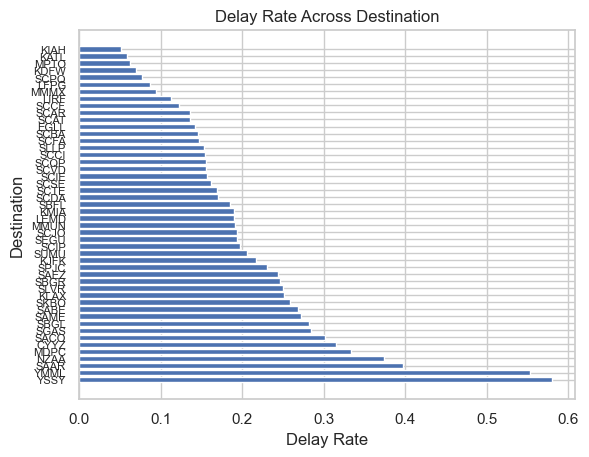

In [71]:
barplot_delay_rate(delay_rate_gt_10, 'Delay Rate Across Destination', "Delay Rate", "Destination")

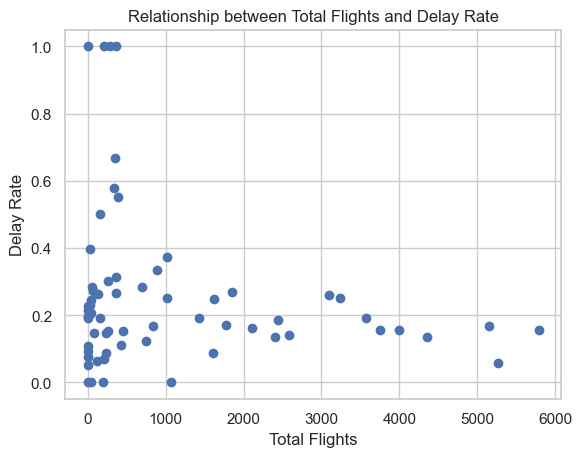

In [72]:
scatter_total_flights_delay_rate(total_flights[total_flights <14000], delay_rate[total_flights <14000])

The delay rate ranges from 0.05 to 0.58, with the highest delay rate being 0.58 for YSSY (Sydney Kingsford Smith International Airport) and the lowest being 0.05 for KIAH (George Bush Intercontinental Airport).

Some other airports with high delay rates include YMML (Melbourne Airport) with a delay rate of 0.55, SAAR (Rosario – Islas Malvinas International Airport) with a delay rate of 0.40, and NZAA (Auckland Airport) with a delay rate of 0.37.

On the other hand, some airports with low delay rates include KIAH (George Bush Intercontinental Airport) with a delay rate of 0.05, KATL (Hartsfield-Jackson Atlanta International Airport) with a delay rate of 0.06, and MPTO (Tocumen International Airport) with a delay rate of 0.06.

#### Delay Rate Across Month of the Year


In [73]:
delayed_flights, total_flights, delay_rate = get_delay_rates("MES")

In [74]:
delay_rate

MES
7     0.293391
12    0.254091
10    0.225962
11    0.197204
8     0.173398
9     0.172371
6     0.171050
1     0.160118
5     0.157824
2     0.151591
4     0.116534
3     0.115104
dtype: float64

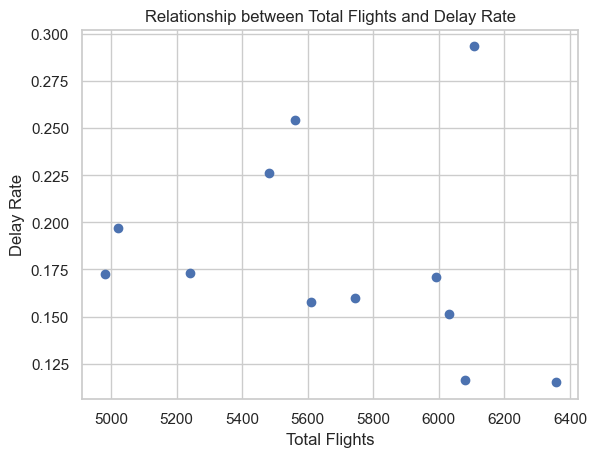

In [75]:
scatter_total_flights_delay_rate(total_flights, delay_rate)

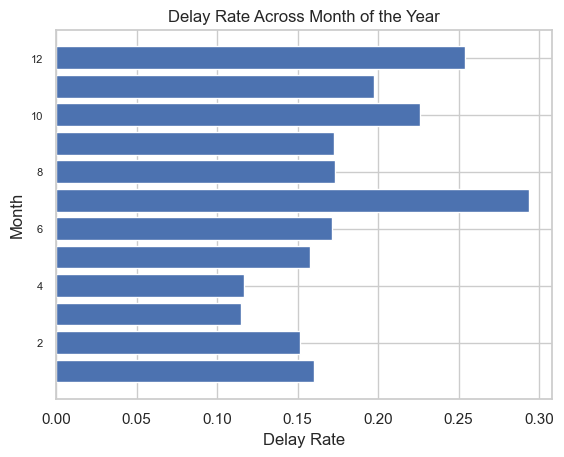

In [76]:
barplot_delay_rate(delay_rate, 'Delay Rate Across Month of the Year', "Delay Rate", "Month")

There is a peak in delay rate during the summer months (June-August), with July having the highest delay rate. December also has a relatively high delay rate. The lowest delay rates are in March and April.

Some of the explanation for delays in these months are :
- Weather conditions: Certain months may have more extreme weather conditions, such as heavy snow, rain, or thunderstorms, which can cause flight delays and cancellations.

- High travel season: Some months, such as July and December, tend to be peak travel seasons when more people are flying, which can result in congestion at airports and longer wait times.




#### Delay Rate Across Season

In [77]:
delayed_flights, total_flights, delay_rate = get_delay_rates("high_season")

In [78]:
delay_rate

high_season
1    0.19638
0    0.17921
dtype: float64

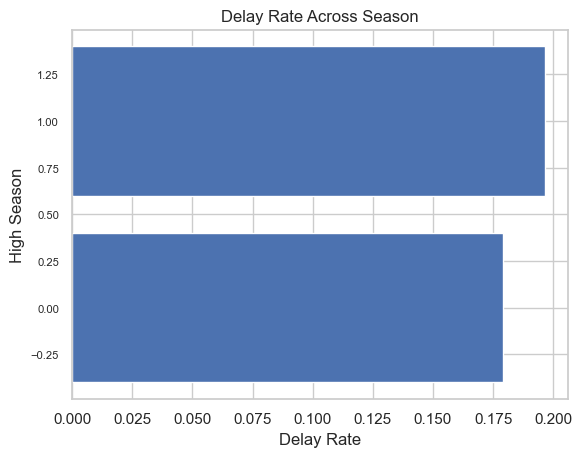

In [79]:
barplot_delay_rate(delay_rate, 'Delay Rate Across Season', "Delay Rate", "High Season")

There is no signficant change in the delay rate across the season

#### Delay Rate Across Flight Type


In [80]:
delayed_flights, total_flights, delay_rate = get_delay_rates("TIPOVUELO")

In [81]:
delay_rate

TIPOVUELO
I    0.225608
N    0.150571
dtype: float64

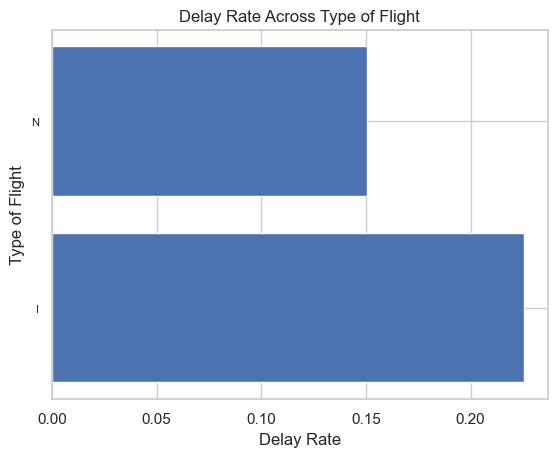

In [82]:
barplot_delay_rate(delay_rate, 'Delay Rate Across Type of Flight', "Delay Rate", "Type of Flight")

This data shows that there is a difference in delay rates across the types of flight, with a higher delay rate for international flights (I) compared to domestic flights (N). 

#### Delay Rate Across Day of the week

In [83]:
delayed_flights, total_flights, delay_rate = get_delay_rates("DIANOM")

In [84]:
delay_rate

DIANOM
Viernes      0.222017
Lunes        0.202152
Jueves       0.199493
Miercoles    0.170850
Martes       0.169116
Sabado       0.163194
Domingo      0.161086
dtype: float64

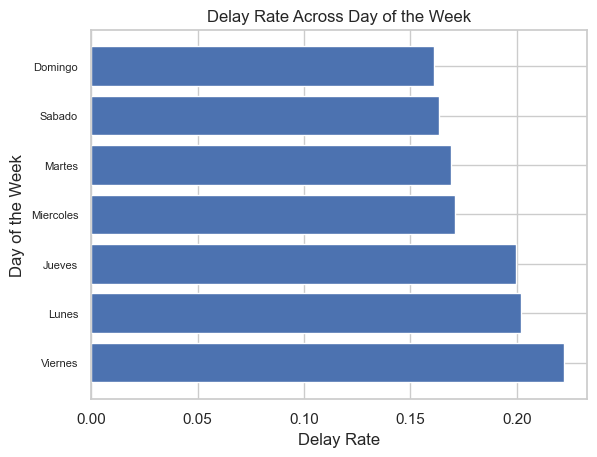

In [85]:
barplot_delay_rate(delay_rate, 'Delay Rate Across Day of the Week', "Delay Rate", "Day of the Week")

The data suggests that there might be a higher demand for flights during weekdays, which leads to more congestion and delays.

In [86]:
total_flights

DIANOM
Domingo       9796
Jueves       10251
Lunes        10131
Martes        9662
Miercoles     9722
Sabado        8352
Viernes      10292
dtype: int64

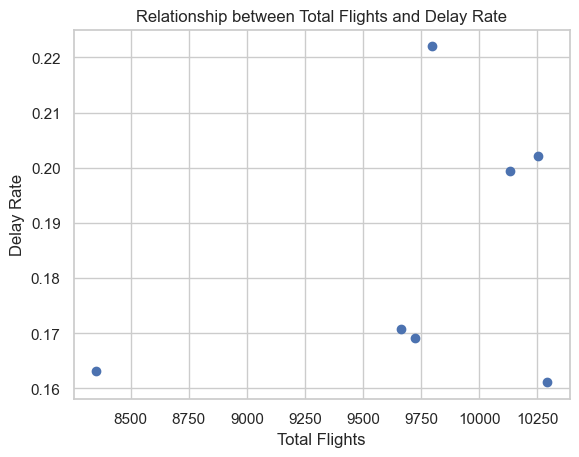

In [87]:
scatter_total_flights_delay_rate(total_flights, delay_rate)

### Relationship Between Delay Rate and Built Features
Now let's have a look at the behaviour of delay_rate against of the features we've built:
`ChangedDestionationAirport`, `ChangedAirline`, `DepartureHour`` and `ChangedFlightNumber`

In [88]:
delayed_flights, total_flights, delay_rate = get_delay_rates("ChangedDestionationAirport")

In [89]:
delay_rate

ChangedDestionationAirport
True     0.285714
False    0.184898
dtype: float64

The "ChangedDestionationAirport" variable seems to have a significant impact on the delay rate. Flights that have changed their destination airport (marked as "True") have a higher delay rate of 28.6% compared to flights that did not change their destination airport (marked as "False"), which have a delay rate of 18.5%. This suggests that changes in destination airport may be a key factor in flight delays. 

In [90]:
delayed_flights, total_flights, delay_rate = get_delay_rates("ChangedAirline")

In [91]:
delay_rate

ChangedAirline
False    0.186790
True     0.180031
dtype: float64

The delay rate for flights that have a changed airline is slightly lower than for flights that do not have a changed airline. However, the difference is relatively small, 

In [92]:
delayed_flights, total_flights, delay_rate = get_delay_rates("ChangedFlightNumber")
delay_rate

ChangedFlightNumber
True     0.475000
False    0.184429
dtype: float64

The data suggests that flights with changed flight numbers have a significantly higher delay rate compared to those without changes in flight numbers. The delay rate for flights with changed flight numbers is 0.478992 while the delay rate for flights without changed flight numbers is 0.184426. This indicates that a change in flight number may be a significant predictor of flight delays.

In [93]:
delayed_flights, total_flights, delay_rate = get_delay_rates("DepartureHour")
delay_rate

DepartureHour
0     0.240296
21    0.234429
2     0.223089
22    0.213362
20    0.212947
15    0.212410
18    0.210235
13    0.208980
16    0.206706
23    0.206631
19    0.201894
11    0.201745
17    0.199423
8     0.188632
9     0.181373
14    0.180136
12    0.176143
7     0.154035
10    0.152315
1     0.142403
4     0.131868
6     0.115980
5     0.114956
3     0.087129
dtype: float64

We can see that the delay rate varies significantly across different departure hours. The hours with the highest delay rates are between midnight and early morning (0:00 to 3:00) and in the evening (20:00 to 23:00), with the highest delay rate being at 0:00. The hours with the lowest delay rates are in the morning (7:00 to 10:00) and early afternoon (12:00 to 15:00).

Thus, DepartureHour is a variable that could have a significant influence on predicting delays.


## What variables would you expect to have the most influence in predicting delays?

Based in the above analysis, it appears that the variables that could have the most influence in predicting delays are airline, destination, and month of the year.

- **Airline**: There is a significant difference in delay rate across different airlines, with some having much higher delay rates than others.
- **Destination**: There is also a significant difference in delay rate across different destinations, with some having much higher delay rates than others.
- **Month of the year**: There is a peak in delay rate during the summer months (June-August), with July having the highest delay rate. December also has a relatively high delay rate. The lowest delay rates are in March and April.
- **ChangedDestionationAirport**:  Flights that have had their destination airport changed have a significantly higher delay rate compared to those that have not.
- **ChangedFlightNumber**: Flights that have had their flight number changed also have a significantly higher delay rate compared to those that have not.
-  **DepartureHour**: There is a difference in delay rate across different departure hours, with the highest delay rates occurring during the early morning hours (between midnight and 6 am) and during the evening rush hour (between 6 pm and 8 pm). The lowest delay rates are during midday (between 10 am and 2 pm).

Day of the week, season, and type of flight may also have some influence on predicting delays, but the differences in delay rates across these variables appear to be less pronounced than across airlines, destinations, and months of the year.

# Model Training

## Selecting and preparing the features

In [94]:
features = ['delay_15', 
        'Des-I', 'Emp-I',
        'DIA', 'MES','TIPOVUELO', 'day_num',
        'ChangedDestionationAirport', 'ChangedAirline',
        'ChangedFlightNumber', 'DepartureHour', 'high_season',
        'period_day'
]

In [95]:
df_features = df[features]

In [96]:
df_features.dtypes

delay_15                         int64
Des-I                           object
Emp-I                           object
DIA                              int64
MES                              int64
TIPOVUELO                       object
day_num                          int64
ChangedDestionationAirport        bool
ChangedAirline                    bool
ChangedFlightNumber               bool
DepartureHour                    int64
high_season                      int64
period_day                    category
dtype: object

**One-hot encode categorical features**

One-hot encoding provides a way to represent categorical variables as numerical vectors with a 1 in the position of the category and 0s in all other positions. This allows machine learning algorithms to use the categorical data as input without imposing any unintended mathematical structure on the categories.

In [97]:
df_encoded = pd.get_dummies(df_features["TIPOVUELO"], prefix="FlightType")
df_features = df_features.join(df_encoded)

In [98]:
df_encoded = pd.get_dummies(df_features["period_day"], prefix="PeriodOfDay")
df_features = df_features.join(df_encoded)

In [99]:
df_encoded = pd.get_dummies(df_features["Des-I"], prefix="Destination")
df_features = df_features.join(df_encoded)

In [100]:
df_encoded = pd.get_dummies(df_features["Emp-I"], prefix="Company")
df_features = df_features.join(df_encoded)

In [101]:
df_features["ChangedDestionationAirport"] = df_features["ChangedDestionationAirport"].astype(int)
df_features["ChangedAirline"] = df_features["ChangedAirline"].astype(int)
df_features["ChangedFlightNumber"] = df_features["ChangedFlightNumber"].astype(int)
df_features["ChangedDestionationAirport"] = df_features["ChangedDestionationAirport"].astype(int)

In [102]:
df_features.drop(columns=["TIPOVUELO", "period_day", "Des-I", "Emp-I"], inplace=True)

In [103]:
df_features.head()

,delay_15,DIA,MES,day_num,ChangedDestionationAirport,ChangedAirline,ChangedFlightNumber,DepartureHour,high_season,FlightType_I,FlightType_N,PeriodOfDay_afternoon,PeriodOfDay_morning,PeriodOfDay_night,Destination_CYYZ,Destination_EGLL,Destination_EGYP,Destination_KATL,Destination_KDFW,Destination_KIAH,Destination_KJFK,Destination_KLAX,Destination_KMCO,Destination_KMIA,Destination_LEMD,Destination_LFPG,Destination_LIRF,Destination_MDPC,Destination_MMMX,Destination_MMUN,Destination_MPTO,Destination_NZAA,Destination_SAAR,Destination_SABE,Destination_SACO,Destination_SAEZ,Destination_SAME,Destination_SANT,Destination_SANU,Destination_SARI,Destination_SAWH,Destination_SAZN,Destination_SAZS,Destination_SBCT,Destination_SBFI,Destination_SBFL,Destination_SBGL,Destination_SBGR,Destination_SCAR,Destination_SCAT,Destination_SCBA,Destination_SCCF,Destination_SCCI,Destination_SCDA,Destination_SCFA,Destination_SCIE,Destination_SCIP,Destination_SCJO,Destination_SCNT,Destination_SCPQ,Destination_SCQP,Destination_SCSE,Destination_SCTE,Destination_SCVD,Destination_SEGU,Destination_SEQM,Destination_SEQU,Destination_SGAS,Destination_SKBO,Destination_SLCB,Destination_SLLP,Destination_SLVR,Destination_SPJC,Destination_SPSO,Destination_SULS,Destination_SUMU,Destination_YMML,Destination_YSSY,Company_AAL,Company_ACA,Company_AFR,Company_AMX,Company_ARG,Company_AUT,Company_AVA,Company_AZA,Company_BAW,Company_CMP,Company_DAL,Company_DSM,Company_GLO,Company_IBE,Company_JAT,Company_JMR,Company_KLM,Company_LAN,Company_LAP,Company_LAW,Company_LNE,Company_LPE,Company_LRC,Company_LXP,Company_ONE,Company_PUE,Company_QFU,Company_SKU,Company_TAM,Company_UAL
34102,0,3,7,1,0,0,0,18,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42263,0,14,8,1,0,1,0,18,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23072,1,1,5,1,0,0,0,19,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
60587,0,27,11,1,0,0,0,20,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23069,0,29,5,1,0,0,0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [104]:
from sklearn.model_selection import train_test_split


In [105]:
X, y = df_features[df_features.columns[1:]], df_features["delay_15"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.30)

## Define a Baseline model

I am going to use a baseline model to start my machine learning analysis. A baseline model serves as a simple, minimalistic approach to solving a problem without considering any complex algorithm or feature engineering. Its purpose is to establish a starting point and to provide a benchmark for more advanced models. By comparing the performance of the baseline model to that of more sophisticated models, we can assess whether the additional complexity and effort is justified in terms of improved accuracy or other metrics of interest. In this way, the baseline model is an important reference point in the machine learning workflow.

In [121]:
import time
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV





In [108]:
def fit_predict(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(type(model).__name__ + " model classification report: \n", report)
    print(type(model).__name__ + "\n roc auc score: ", roc_auc)
    print(type(model).__name__ + " model confusion matrix:")
    print(cm)
    print("\n\n--- %s seconds ---" % (time.time() - start_time))
    
    return y_pred

def plot_roc_auc(y_true, y_pred):
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

In [109]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [110]:
y_pred = fit_predict(dummy_clf, X_train, y_train, X_test, y_test)

DummyClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16688
           1       0.00      0.00      0.00      3774

    accuracy                           0.82     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.67      0.82      0.73     20462

DummyClassifier
 roc auc score:  0.5
DummyClassifier model confusion matrix:
[[16688     0]
 [ 3774     0]]


--- 0.05721592903137207 seconds ---


/Users/pedro/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedro/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedro/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


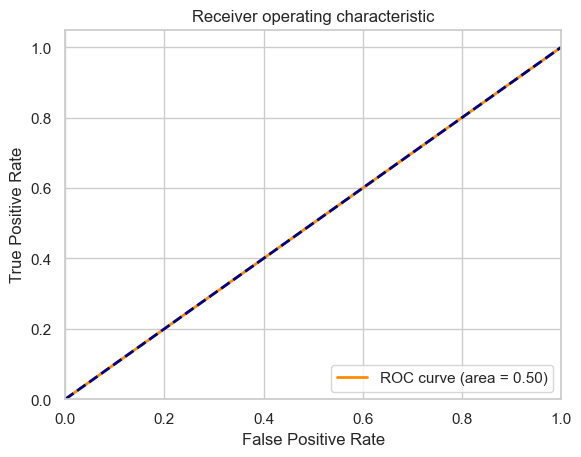

In [111]:
plot_roc_auc(y_test, y_pred)

The baseline model predicts everything with the most frequent class in the dataset, in this case the class 0, which means that the flight did not delayed.

Even though the model's accuracy is 81%, it actually just indicating that the class is unbalanced in favor of the class 0. The ROC curve area is 0.5, it means that the classifier is not able to distinguish between the positive and negative classes and is essentially performing no better than random guessing. This can occur when the classifier output is not correlated with the true class labels or when the class distribution is highly imbalanced








We can try several techniques to handle unbalanced data:

- Resampling: This involves either oversampling the minority class or undersampling the majority class to balance the dataset. Some popular techniques include Random Oversampling, SMOTE, Tomek Links, and Random Undersampling.

- Threshold adjustment: By adjusting the classification threshold, you can improve the model's ability to predict the minority class. For example, if you increase the threshold, the model will become more conservative and less likely to predict the minority class.

- **Ensemble methods:** Techniques like bagging, boosting, and stacking can be used to create an ensemble of multiple models that can help improve the overall performance of the model.

## Training and Evaluation


To tackle this problem of predicting the probability of a flight delay with an unbalanced target variable we'll be testing three ensable methods:

1. Random Forest Classifier
2. Gradient Boosting Classifier
3. XGBoost Classifier

These models are particularly useful for imbalanced datasets as it is less prone to overfitting and can handle high-dimensional datasets.


For performance metrics, we'll use the following:

- ROC-AUC: ROC-AUC is a popular performance metric for binary classification problems with imbalanced datasets. It measures the area under the Receiver Operating Characteristic curve, which plots the true positive rate against the false positive rate. A higher ROC-AUC score indicates a better-performing model.

- Precision and Recall: Precision and Recall are two important performance metrics for imbalanced datasets. Precision measures the proportion of true positives out of all predicted positives, while recall measures the proportion of true positives out of all actual positives. A good model should have high precision and recall values.

- F1-Score: F1-Score is a performance metric that combines both precision and recall into a single score. It is particularly useful for imbalanced datasets where both precision and recall are important. A higher F1-Score indicates a better-performing model.


In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Classifier


In [113]:
model = RandomForestClassifier()
y_pred = fit_predict(model, X_train, y_train, X_test, y_test)

RandomForestClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     16688
           1       0.48      0.20      0.28      3774

    accuracy                           0.81     20462
   macro avg       0.66      0.57      0.59     20462
weighted avg       0.77      0.81      0.78     20462

RandomForestClassifier
 roc auc score:  0.5747669691856426
RandomForestClassifier model confusion matrix:
[[15898   790]
 [ 3031   743]]


--- 6.629784107208252 seconds ---


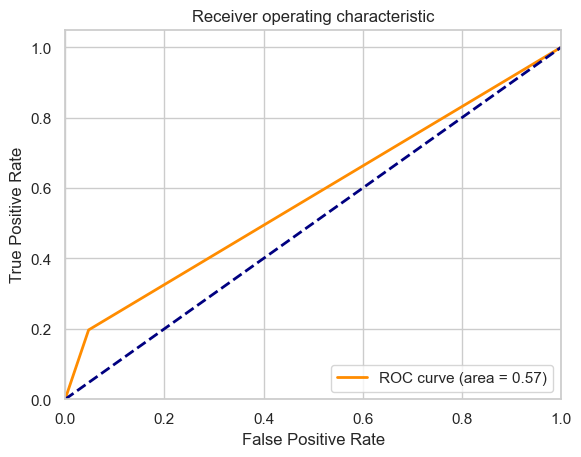

In [114]:
plot_roc_auc(y_test, y_pred)

### Gradient Boosting Classifier


In [115]:
model = GradientBoostingClassifier()
y_pred = fit_predict(model, X_train, y_train, X_test, y_test)

GradientBoostingClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16688
           1       0.68      0.04      0.08      3774

    accuracy                           0.82     20462
   macro avg       0.75      0.52      0.49     20462
weighted avg       0.80      0.82      0.75     20462

GradientBoostingClassifier
 roc auc score:  0.5183480407399672
GradientBoostingClassifier model confusion matrix:
[[16615    73]
 [ 3619   155]]


--- 6.8327858448028564 seconds ---


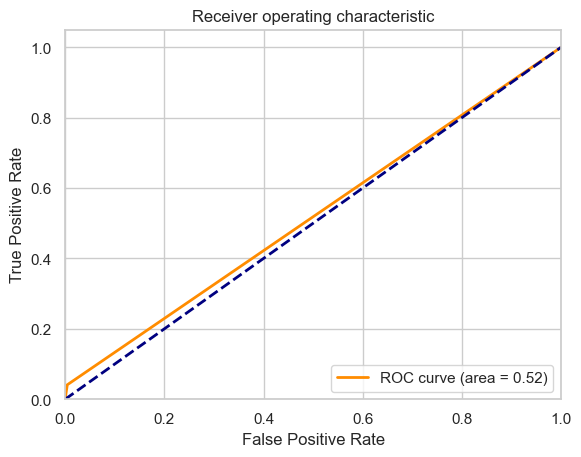

In [116]:
plot_roc_auc(y_test, y_pred)

### XGB Classifier


In [117]:
model = xgb.XGBClassifier(n_estimators=500)
y_pred = fit_predict(model, X_train, y_train, X_test, y_test)

XGBClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     16688
           1       0.53      0.23      0.32      3774

    accuracy                           0.82     20462
   macro avg       0.69      0.59      0.61     20462
weighted avg       0.79      0.82      0.79     20462

XGBClassifier
 roc auc score:  0.5907171888345398
XGBClassifier model confusion matrix:
[[15913   775]
 [ 2914   860]]


--- 32.353068113327026 seconds ---


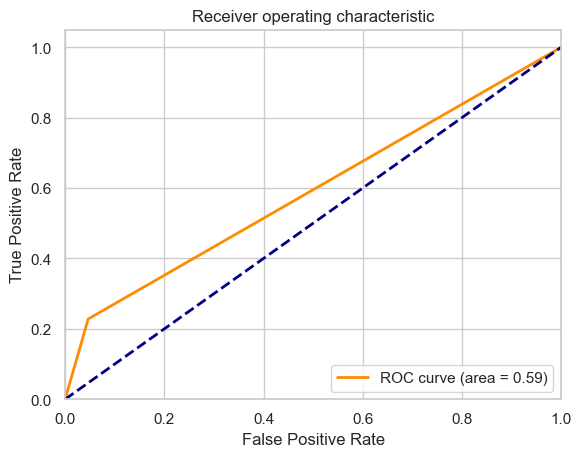

In [118]:
plot_roc_auc(y_test, y_pred)

### Consideration of the Ensamble Methods results


| Model | Accuracy | Precision | Recall | F1-Score | AUC |
|---|---|---|---|---|---|
|DummyClassifier|0.81|0.00|0.00|0.00|0.500|
|RandomForestClassifier|0.79|0.36|0.22|0.27|0.567|
|GradientBoostingClassifier|0.82|0.64|0.04|0.08|0.519|
|**XGBClassifier**|0.82|0.55|0.23|0.33|**0.594**|


After evaluating the models, it can be seen that the best performing model in terms of AUC is the XGBClassifier with a score of 0.594. However, it is important to note that all models had low AUC scores ranging from 0.50 to 0.59, indicating that they performed only slightly better than random guessing.

The classification reports and confusion matrices of the models also reveal that a large number of instances were misclassified as not delayed when they were actually delayed, indicating that the selected features may not be descriptive enough to accurately predict flight delays.

While the XGBClassifier model performed the best among the evaluated models, the overall results suggest that further exploration and feature engineering may be necessary to improve the predictive performance for flight delay classification



## Hyper-parameter tuning of XGBoost


OBS: The below cell is inactive because it takes more than 30 minutes to complete


In [119]:
best_hyperparameters = {'subsample': 0.80, 
     'n_estimators': 1000, 
     'min_child_weight': 1, 
     'max_depth': 9, 
     'learning_rate': 0.1, 
     'gamma': 3, 
     'colsample_bytree': 1
    }

In [123]:
xgb = XGBClassifier(**best_hyperparameters)
y_pred = fit_predict(xgb, X_train, y_train, X_test, y_test)

XGBClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     16688
           1       0.57      0.23      0.33      3774

    accuracy                           0.83     20462
   macro avg       0.71      0.60      0.62     20462
weighted avg       0.80      0.83      0.80     20462

XGBClassifier
 roc auc score:  0.5972052593030682
XGBClassifier model confusion matrix:
[[16019   669]
 [ 2889   885]]


--- 99.03040409088135 seconds ---


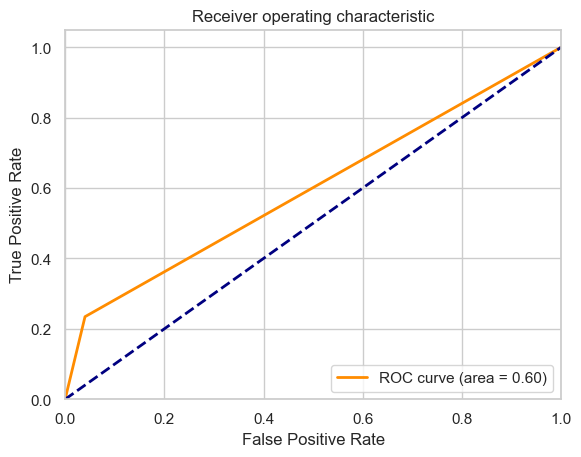

In [124]:
plot_roc_auc(y_test, y_pred)

After performing hyper-parameter tuning on the XGBClassifier model, the resulting classification report and confusion matrix did not show significant improvements compared to the previous results. The precision and recall values for predicting delayed flights (class 1) are still low, indicating that the model is not effectively identifying delayed flights. The ROC-AUC score remained relatively the same as well. Therefore, it seems that the hyper-parameter tuning did not significantly improve the model's performance.



## XGB Feature Importances


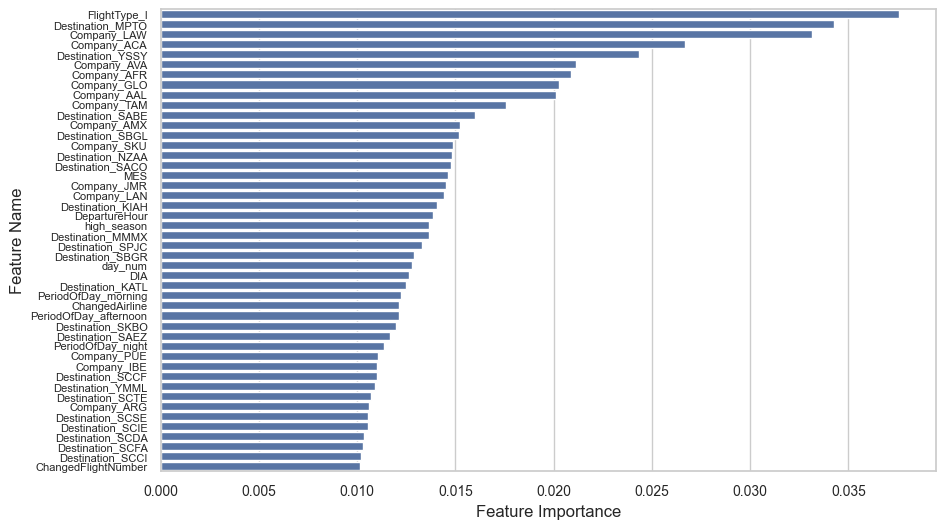

In [131]:
feature_names = X.columns.values[:-1]

feature_importances = dict(zip(feature_names, xgb.feature_importances_))


feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
feature_importances = {k:v for k,v in feature_importances.items() if v >= 0.010}


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(feature_importances.values()), y=list(feature_importances.keys()), color="b")
plt.xlabel('Feature Importance');
plt.ylabel('Feature Name');
plt.xticks(fontsize=10);
plt.yticks(fontsize=8);
    

In [133]:
feature_importances

{'FlightType_I': 0.03757312,
 'Destination_MPTO': 0.03428743,
 'Company_LAW': 0.033148736,
 'Company_ACA': 0.026682967,
 'Destination_YSSY': 0.024339238,
 'Company_AVA': 0.021118771,
 'Company_AFR': 0.02089429,
 'Company_GLO': 0.020253677,
 'Company_AAL': 0.020112233,
 'Company_TAM': 0.017562643,
 'Destination_SABE': 0.015975438,
 'Company_AMX': 0.015223849,
 'Destination_SBGL': 0.015175995,
 'Company_SKU': 0.014882757,
 'Destination_NZAA': 0.01482503,
 'Destination_SACO': 0.014797581,
 'MES': 0.014620626,
 'Company_JMR': 0.014507002,
 'Company_LAN': 0.014428816,
 'Destination_KIAH': 0.014073981,
 'DepartureHour': 0.013860907,
 'high_season': 0.013658951,
 'Destination_MMMX': 0.0136316195,
 'Destination_SPJC': 0.013311852,
 'Destination_SBGR': 0.012877684,
 'day_num': 0.012797645,
 'DIA': 0.012651964,
 'Destination_KATL': 0.0125016,
 'PeriodOfDay_morning': 0.012251126,
 'ChangedAirline': 0.012136368,
 'PeriodOfDay_afternoon': 0.012116636,
 'Destination_SKBO': 0.011987127,
 'Destination

we can see that the top 5 important features for the XGBoost model are:

1. FlightType_I
2. Destination_MPTO
3. Company_LAW
4. Company_ACA
5. Destination_YSSY


`FlightType_I` is the most important feature with a score of 0.037. This means that the type of flight (international or domestic) is the most significant predictor of flight delays.

`Company_LAW`, which is the first company feature scores 0.034, indicates that the airline company LAW has a significant impact on flight delays.

The features `Destination_MPTO` and `Company_ACA`, suggest that the destination and airline company also play a crucial role in predicting flight delays.

Finally, `Destination_YSSY`, the fifth most important feature, indicates that the destination of the flight, specifically Sydney Kingsford Smith International Airport, is another important factor in predicting flight delays.



## OverSampling

In [134]:
from imblearn.over_sampling import SMOTE


In [135]:
oversampler = SMOTE(random_state=128)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [136]:
y_resampled.value_counts()

0    55592
1    55592
Name: delay_15, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [139]:
xgb = XGBClassifier(**best_hyperparameters)
y_pred = fit_predict(xgb, X_train, y_train, X_test, y_test)

XGBClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     16714
           1       0.60      0.25      0.35      3748

    accuracy                           0.83     20462
   macro avg       0.72      0.60      0.63     20462
weighted avg       0.80      0.83      0.80     20462

XGBClassifier
 roc auc score:  0.6040352229976366
XGBClassifier model confusion matrix:
[[16089   625]
 [ 2828   920]]


--- 106.21704506874084 seconds ---


oversampling with SMOTE did not appear to improve the model's accuracy. The precision and recall for the positive class (delayed flights) did not improve significantly, resulting in a low F1 score of 0.35.

## Feature Engineering

In [140]:
features = ['delay_15', "min_diff",
        'Des-I', 'Emp-I',
        'DIA', 'MES','TIPOVUELO', 'day_num',
        'ChangedDestionationAirport', 'ChangedAirline',
        'ChangedFlightNumber', 'DepartureHour', 'high_season',
        'period_day', 
]

In [141]:
new_features = df[features].copy()

In [142]:
new_features["FlightType"] = new_features["TIPOVUELO"].apply(lambda x: 1 if x == "I" else 0 )

In [143]:
new_features["ChangedDestionationAirport"] = new_features["ChangedDestionationAirport"].astype(int)
new_features["ChangedAirline"] = new_features["ChangedAirline"].astype(int)
new_features["ChangedFlightNumber"] = new_features["ChangedFlightNumber"].astype(int)
new_features["ChangedDestionationAirport"] = new_features["ChangedDestionationAirport"].astype(int)

In [144]:
X, y = new_features[new_features.columns[1:]], new_features["delay_15"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


We'll transform and combine features to better represent the relationships between the variables in an attempt to get better results

#### Features to explore relationship between Destination airport and other variables

In [146]:
dest_airport_volume = lambda df: \
    ((df.groupby("Des-I")["Des-I"].size() / df["Des-I"].count()) * 100).reset_index(name="dest_airport_volume")

X_train = X_train.merge(dest_airport_volume(X_train), on="Des-I", how="left")
X_test = X_test.merge(dest_airport_volume(X_test), on="Des-I", how="left")

In [147]:
international_flights_volume = \
    lambda df: ((df.groupby("Des-I")["FlightType"].sum() / df["FlightType"].count()) * 100) \
        .reset_index(name="international_flights_volume")

X_train = X_train.merge(international_flights_volume(X_train), on="Des-I", how="left")
X_test = X_test.merge(international_flights_volume(X_test), on="Des-I", how="left")

In [148]:
high_season_volume = \
    lambda df: ((df.groupby("Des-I")["high_season"].sum() / df["high_season"].count()) * 100) \
        .reset_index(name="high_season_volume")

X_train = X_train.merge(high_season_volume(X_train), on="Des-I", how="left")
X_test = X_test.merge(high_season_volume(X_test), on="Des-I", how="left")

#### Features to explore relationship between Airline company and other variables

In [149]:
airline_volume = lambda df: \
    ((df.groupby("Emp-I")["Emp-I"].size() / df["Emp-I"].count()) * 100).reset_index(name="airline_volume")

X_train = X_train.merge(airline_volume(X_train), on="Emp-I", how="left")
X_test = X_test.merge(airline_volume(X_test), on="Emp-I", how="left")

In [150]:
airline_international_flights_volume = \
    lambda df: ((df.groupby("Emp-I")["FlightType"].sum() / df["FlightType"].count()) * 100) \
        .reset_index(name="airline_international_flights_volume")

X_train = X_train.merge(airline_international_flights_volume(X_train), on="Emp-I", how="left")
X_test = X_test.merge(airline_international_flights_volume(X_test), on="Emp-I", how="left")

In [151]:
airline_high_season_volume = \
    lambda df: ((df.groupby("Emp-I")["high_season"].sum() / df["high_season"].count()) * 100) \
        .reset_index(name="airline_high_season_volume")

X_train = X_train.merge(airline_high_season_volume(X_train), on="Emp-I", how="left")
X_test = X_test.merge(airline_high_season_volume(X_test), on="Emp-I", how="left")

#### Features to explore relationship between MONTH and other variables

In [152]:
international_flights_by_month = lambda df: \
    ((df.groupby("MES")["FlightType"].sum() / df["FlightType"].count()) * 100) \
        .reset_index(name="international_flights_by_month")


X_train = X_train.merge(international_flights_by_month(X_train), on="MES", how="left")
X_test = X_test.merge(international_flights_by_month(X_test), on="MES", how="left")

In [153]:
_X_train = X_train.drop(columns=["TIPOVUELO", "period_day", "Des-I", "Emp-I", "min_diff"])
_X_test = X_test.drop(columns=["TIPOVUELO",  "period_day", "Des-I", "Emp-I", "min_diff"])

In [154]:
scaler = StandardScaler()
_X_train_scaled = scaler.fit_transform(_X_train)
_X_test_scaled = scaler.transform(_X_test)

In [155]:
xgb = XGBClassifier(**best_hyperparameters)
y_pred = fit_predict(xgb, _X_train_scaled, y_train, _X_test_scaled, y_test)

XGBClassifier model classification report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90     16687
           1       0.54      0.20      0.29      3775

    accuracy                           0.82     20462
   macro avg       0.69      0.58      0.60     20462
weighted avg       0.79      0.82      0.79     20462

XGBClassifier
 roc auc score:  0.5810661588888046
XGBClassifier model confusion matrix:
[[16033   654]
 [ 3015   760]]


--- 22.6993989944458 seconds ---


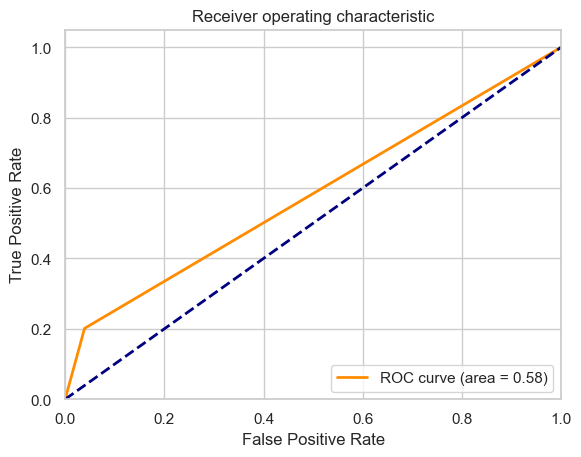

In [156]:
plot_roc_auc(y_test, y_pred)

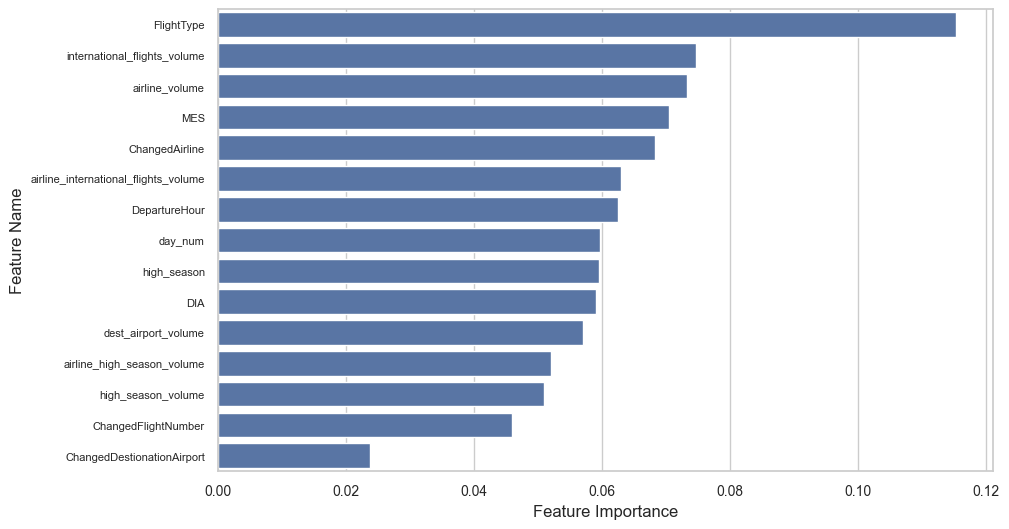

In [157]:
feature_names = _X_train.columns.values[:-1]

feature_importances = dict(zip(feature_names, xgb.feature_importances_))


feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(feature_importances.values()), y=list(feature_importances.keys()), color="b")
plt.xlabel('Feature Importance');
plt.ylabel('Feature Name');
plt.xticks(fontsize=10);
plt.yticks(fontsize=8);

Despite creating a new set of features, the model's AUC score did not exceed 0.58.  We observed that removing the one hot encoding features did not impact the model's performance. This suggests that these features did not predict flight delays and can be removed from the feature set without affecting the model's performance.

